### Imports

In [1]:
import numpy as np

import sympy as sym

import itertools

import pandas as pd

In [2]:
from operator import itemgetter

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 13

## Evolutionary simulations

In [5]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [7]:
names1 = [f"p_{i}" for i in range(1, 3)] + ["t", "cooperation"]
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
names3 = [f"p_{i}" for i in range(1, 9)] + ["t", "cooperation"]
names4 = [f"p_{i}" for i in range(1, 17)] + ["t", "cooperation"]

dfs1 = [
    [pd.read_csv(f"../data/matlab_data/bits_2_beta_0.1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_4_beta_0.1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_8_beta_0.1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs2 = [
    [pd.read_csv(f"../data/matlab_data/bits_2_beta_1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_4_beta_1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_8_beta_1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs3 = [
    [pd.read_csv(f"../data/matlab_data/bits_2_beta_10_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_4_beta_10_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../data/matlab_data/bits_8_beta_10_seed_1_c_{c}.csv", names=names3) for c in cs],
]

In [8]:
dfs1 = [[df.drop_duplicates() for df in dfs] for dfs in dfs1]
dfs2 = [[df.drop_duplicates() for df in dfs] for dfs in dfs2]
dfs3 = [[df.drop_duplicates() for df in dfs] for dfs in dfs3]

In [9]:
def frequencies(dfs, max_steps=10 ** 7):

    for df in dfs:
        frequencies = []
        previous = 0
        for value in df["t"][1:]:
            frequencies.append(value - previous)
            previous = value
        frequencies.append(max_steps - previous)

        df["frequencies"] = np.array(frequencies)
        df["frequencies norm"] = np.array(frequencies) / max_steps

    return dfs

In [10]:
df_beta_pnt = [frequencies(dfs) for dfs in dfs1[:-1]] + [frequencies(dfs1[-1], (2 * 10 ** 7))]
df_beta_one = [frequencies(dfs) for dfs in dfs2[:-1]] + [frequencies(dfs2[-1], (2 * 10 ** 7))]
df_beta_ten = [frequencies(dfs) for dfs in dfs3[:-1]] + [frequencies(dfs3[-1], (2 * 10 ** 7))]

In [11]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=10"]

In [12]:
c = "yellowgreen"

In [13]:
matplotlib.colors.to_hex(c, keep_alpha=False)

'#9acd32'

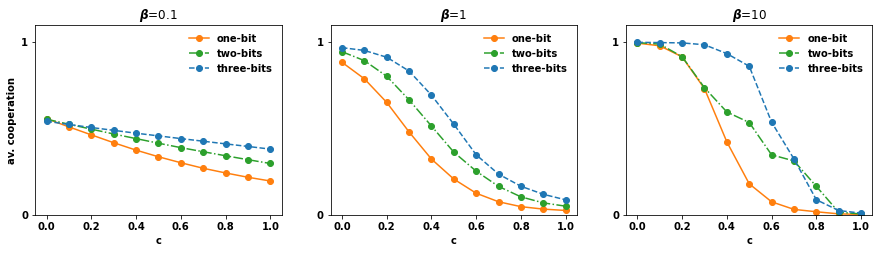

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5))

for i, gdfs in enumerate([df_beta_pnt, df_beta_one, df_beta_ten]):

    points = [
        [sum(df["frequencies norm"] * df["cooperation"]) for df in dfs] for dfs in gdfs
    ]

    axes[i].plot(np.linspace(0, 1, 11), points[0], "-o", label="one-bit",  color="tab:orange")
    axes[i].plot(np.linspace(0, 1, 11), points[1], "-.o", label="two-bits", color="tab:green")
    axes[i].plot(np.linspace(0, 1, 11), points[2], "--o", label="three-bits", color="tab:blue")

    axes[i].set_ylim(0, 1.1)

    axes[i].set_yticks(np.arange(0, 2))

    axes[i].set_xlabel("c")

    axes[i].legend(framealpha=0)
    axes[i].set_title(labels[i])

axes[0].set_ylabel("av. cooperation");

# axes[0].plot(np.linspace(0, 1, 11), sxt_bits_points, "--o", label="4 bit");
# axes[1].plot(np.linspace(0, 1, 11), sxt_bits_one_points, "--o", label="4 bit");

axes[0].legend(framealpha=0);
axes[1].legend(framealpha=0);

# plt.savefig("../static/average_cooperation_over_c_with_diff_selection_strength.pdf", bbox_inches='tight')

plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/five.png", 
            transparent=True,  bbox_inches='tight')

In [27]:
abundance = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in dfs2[0]
]

In [28]:
abundance2 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in dfs2[1]
]

In [29]:
abundance3 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
        df.iloc[df["frequencies"].idxmax()]["p_5"],
        df.iloc[df["frequencies"].idxmax()]["p_6"],
        df.iloc[df["frequencies"].idxmax()]["p_7"],
        df.iloc[df["frequencies"].idxmax()]["p_8"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in dfs2[2]
]

In [30]:
colours = ['tab:orange', 'tab:green', 'tab:blue']

dims = [2, 4, 8]

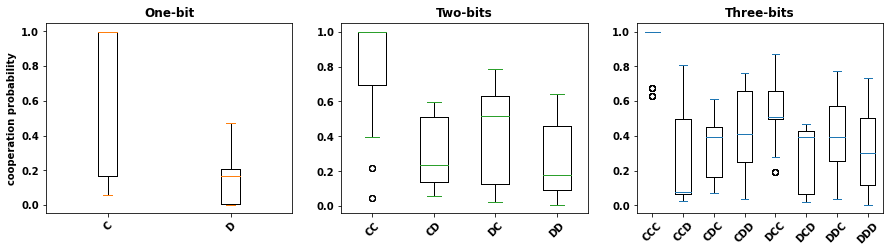

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5))


for j, ab, dim in zip(range(3), [abundance, abundance2, abundance3], dims):
    
    data = [[b[i] for b in ab] for i in range(dim)]

    for i in range(dim):
        boxes = axes[j].boxplot(data)
        
        for element in [
                        'fliers', 'means',
                        'medians', 'caps']:
            plt.setp(boxes[element], color=colours[j])
        
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C", "D"], rotation=45)
axes[0].set_title("One-bit", fontweight="bold")
axes[0].set_ylabel("cooperation probability")


axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"], rotation=45)
axes[1].set_title("Two-bits", fontweight="bold")

axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["CCC", "CCD", "CDC", "CDD", "DCC", "DCD", "DDC", "DDD"], rotation=45)
axes[2].set_title("Three-bits", fontweight="bold");

plt.savefig("../static/evolution_results_boxplots.pdf", bbox_inches='tight')

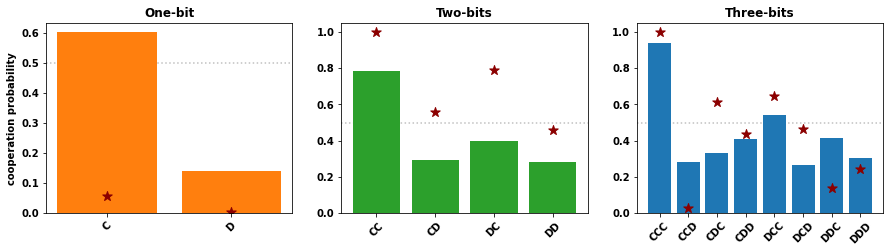

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5))

heights = [[b[i] for b in abundance] for i in range(2)]

errors = [np.std(h) for h in heights]

for i in range(2):
    axes[0].bar(i + 1, np.mean(heights[i]), color=colours[0])
    
for i, point in enumerate(max(abundance, key=itemgetter(2))[:2]):
    axes[0].scatter(i + 1, point, marker="*", color='darkred', s=100)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C", "D"], rotation=45)
axes[0].set_title("One-bit", fontweight="bold")

axes[0].set_ylabel("cooperation probability")

heights = [[b[i] for b in abundance2] for i in range(4)]
errors = [np.std(h) for h in heights]

for i in range(4):
    axes[1].bar(i + 1, np.mean(heights[i]), color=colours[1])

for i, point in enumerate(max(abundance2, key=itemgetter(2))[:4]):
    axes[1].scatter(i + 1, point, marker="*", color='darkred', s=100)
    
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"], rotation=45)
axes[1].set_title("Two-bits", fontweight="bold")

heights = [[b[i] for b in abundance3] for i in range(8)]
errors = [np.std(h) for h in heights]

for i in range(8):
    axes[2].bar(i + 1, np.mean(heights[i]), color=colours[2])

for i, point in enumerate(max(abundance3, key=itemgetter(2))[:8]):
    axes[2].scatter(i + 1, point, marker="*", color='darkred', s=100)
axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["CCC", "CCD", "CDC", "CDD", "DCC", "DCD",
                         "DDC", "DDD"], rotation=45)
axes[2].set_title("Three-bits", fontweight="bold");

for ax in axes:
    ax.axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)

plt.savefig("../static/evolution_results_barplots.pdf", bbox_inches='tight')